In [154]:
import pandas as pd
import numpy as np
from unidecode import unidecode

In [ ]:
import os

root_dir = os.path.abspath(os.path.join(os.path.dirname(__file__), '..'))

data_folder = os.path.join(root_dir, 'csv_files')

data_files = [f for f in os.listdir(data_folder) if f.endswith(('.csv', '.xlsx'))]

dfs = {}
for file in data_files:
    file_path = os.path.join(data_folder, file)
    if file.endswith('.csv'):
        dfs[file] = pd.read_csv(file_path)
    elif file.endswith('.xlsx'):
        dfs[file] = pd.read_excel(file_path, engine='openpyxl')

In [ ]:
df01 = dfs('NHL_Final-01.csv')
df02 = dfs('NHL_Final-02.csv')


In [156]:
df02 = df02.drop(columns = ['GP', 'Pos', 'TK', 'GV', '-9999'])
df02.head()

,Player,CF,CA,CF%,CF% rel,FF,FA,FF%,FF% rel,oiSH%,oiSV%,PDO,oZS%,dZS%,TOI/60,TOI(EV),E+/-,SAtt.,Thru%
0,Wyatt Aamodt,23,37,38.3,-15.0,18,21,46.2,-10.3,10.0,100.0,110.0,20.0,80.0,17:07,16:16,0.1,6,50.0
1,Rodrigo Abols,191,199,49.0,0.3,137,135,50.4,0.3,8.3,84.7,93.0,61.2,38.8,9:11,9:09,-1.4,48,52.1
2,Noel Acciari,729,957,43.2,-8.9,506,658,43.5,-7.6,6.8,88.6,95.4,20.3,79.7,13:46,11:20,-11.9,151,49.7
3,Jack Ahcan,30,32,48.4,-0.9,22,19,53.7,0.1,11.1,93.3,104.4,26.7,73.3,15:48,14:40,0.2,3,33.3
4,Sebastian Aho,1519,968,61.1,2.8,1094,721,60.3,3.3,10.8,85.8,96.7,63.8,36.2,20:06,14:49,9.1,447,46.3


In [157]:
df01['Player'] = df01['Player'].apply(unidecode).str.lower().str.strip()
df02 ['Player'] = df02['Player'].apply(unidecode).str.lower().str.strip()
df03 = pd.merge (df01, df02, how = 'left', on='Player')

In [158]:
df03 = df03.drop(df03[df03['GP'] <= 41].index).reset_index(drop = True)

df03 = df03.replace({'RW': 'F', 'LW': 'F', 'C': 'F'})

df03 = df03.drop (df03[df03['Pos'] == 'G'].index).reset_index(drop = True)

df03 = df03.replace({'--': 0})

df03 = df03.fillna(0)

In [159]:
df03.head()

,Player,Age,Pos,GP,G,A,PTS,+/-,PIM,EVG,...,oiSH%,oiSV%,PDO,oZS%,dZS%,TOI/60,TOI(EV),E+/-,SAtt.,Thru%
0,nikita kucherov,31.0,F,78,37,84,121,22,45,29,...,13.7,90.1,103.9,59.6,40.4,21:11,17:21,16.3,550.0,48.2
1,nathan mackinnon,29.0,F,79,32,84,116,25,41,23,...,11.0,88.9,99.9,63.8,36.2,22:47,18:54,35.1,590.0,54.2
2,leon draisaitl,29.0,F,71,52,54,106,32,34,36,...,10.7,89.9,100.7,60.6,39.4,21:31,18:11,27.3,417.0,57.8
3,david pastrnak,28.0,F,82,43,63,106,0,42,34,...,13.3,87.3,100.5,68.8,31.2,20:11,16:42,1.0,624.0,51.1
4,mitch marner,27.0,F,81,27,75,102,18,14,20,...,13.1,89.9,103.1,48.6,51.4,21:19,16:11,11.6,393.0,44.0


In [160]:
df_final = df03.copy()
df_final.head()
df_final = df_final.drop(columns = ['TOI/60'])

In [161]:
df_final ['TOI(EV)'] = pd.to_timedelta('00:' + df_final['TOI(EV)'].astype(str)).dt.total_seconds()/60

In [162]:
df_final = df_final.fillna(0)
df_final = df_final.replace({'--': 0})
df_final = df_final.drop(columns = ['Age', 'Pos'])

In [163]:
df_final.head()

,Player,GP,G,A,PTS,+/-,PIM,EVG,PPG,SHG,...,FF% rel,oiSH%,oiSV%,PDO,oZS%,dZS%,TOI(EV),E+/-,SAtt.,Thru%
0,nikita kucherov,78,37,84,121,22,45,29,8,0,...,3.8,13.7,90.1,103.9,59.6,40.4,17.350000,16.3,550.0,48.2
1,nathan mackinnon,79,32,84,116,25,41,23,9,0,...,7.8,11.0,88.9,99.9,63.8,36.2,18.900000,35.1,590.0,54.2
2,leon draisaitl,71,52,54,106,32,34,36,16,0,...,7.8,10.7,89.9,100.7,60.6,39.4,18.183333,27.3,417.0,57.8
3,david pastrnak,82,43,63,106,0,42,34,9,0,...,6.2,13.3,87.3,100.5,68.8,31.2,16.700000,1.0,624.0,51.1
4,mitch marner,81,27,75,102,18,14,20,6,1,...,3.0,13.1,89.9,103.1,48.6,51.4,16.183333,11.6,393.0,44.0


In [ ]:
df1 = dfs("NHL_STATS01.xlsx")
df2 = dfs("NHL_STATS02.xlsx")
df3 = dfs("NHL_STATS03.xlsx")
df4 = dfs("NHL_STATS04.xlsx")
df5 = dfs("NHL_STATS05.xlsx")
df6 = dfs("NHL_STATS06.xlsx")
df7 = dfs("NHL_STATS07.xlsx")
df8 = dfs("NHL_STATS08.xlsx")
df9 = dfs("NHL_STATS09.xlsx")
df10 = dfs("NHL_STATS10.xlsx")

df = pd.concat([df1,df2, df3, df4, df5, df6, df7, df8, df9, df10], ignore_index = True)


In [165]:
df.head()
df_time = df[['Player', 'TOI/GP']]


In [166]:
df_time.head()

,Player,TOI/GP
0,Nikita Kucherov,21:11
1,Nathan MacKinnon,22:47
2,Leon Draisaitl,21:31
3,David Pastrnak,20:11
4,Mitchell Marner,21:19


In [167]:
df_time ['TOI/GP'] = pd.to_timedelta('00:' + df_time['TOI/GP'].astype(str)).dt.total_seconds()/60

C:\Users\huzay\AppData\Local\Temp\ipykernel_9740\1213958053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time ['TOI/GP'] = pd.to_timedelta('00:' + df_time['TOI/GP'].astype(str)).dt.total_seconds()/60


In [168]:
df_time['Player'] = df_time['Player'].apply(unidecode).str.lower().str.strip()


C:\Users\huzay\AppData\Local\Temp\ipykernel_9740\2280455589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['Player'] = df_time['Player'].apply(unidecode).str.lower().str.strip()


In [169]:
nhl_df = pd.merge(df_final, df_time, how = 'left', on = 'Player')

In [170]:
nhl_df.loc[nhl_df['Player'] == 'mitch marner', 'TOI/GP'] = 21.3167
nhl_df.loc[nhl_df['Player'] == 'jj peterka', 'TOI/GP'] = 18.1833
nhl_df.loc[nhl_df['Player'] == 'matthew coronato', 'TOI/GP'] = 17.5833
nhl_df.loc[nhl_df['Player'] == 'william cuylle', 'TOI/GP'] = 15.0833
nhl_df.loc[nhl_df['Player'] == 'michael anderson', 'TOI/GP'] = 22.6667
nhl_df.loc[nhl_df['Player'] == 'jacob middleton', 'TOI/GP'] = 21.8667
nhl_df.loc[nhl_df['Player'] == 'pat maroon', 'TOI/GP'] = 11.5333
nhl_df.loc[nhl_df['Player'] == 'emil martinsen lilleberg', 'TOI/GP'] = 15.2833
nhl_df.loc[nhl_df['Player'] == 'nicklaus perbix', 'TOI/GP'] = 14.6833
nhl_df.loc[nhl_df['Player'] == 'cameron york', 'TOI/GP'] = 20.7833
nhl_df.loc[nhl_df['Player'] == 'joe veleno', 'TOI/GP'] = 12.1167
nhl_df.loc[nhl_df['Player'] == 'william borgen', 'TOI/GP'] = 17.0833
nhl_df.loc[nhl_df['Player'] == 'zachary jones', 'TOI/GP'] = 17.25
nhl_df.loc[nhl_df['Player'] == 't.j. brodie', 'TOI/GP'] = 15.6333
nhl_df.loc[nhl_df['Player'] == 'jonathon merrill', 'TOI/GP'] = 14.10
nhl_df.loc[nhl_df['Player'] == 'pierre-olivier joseph', 'TOI/GP'] = 15.2667



In [171]:
nhl_df = nhl_df.drop (columns = 'SAtt.')
nhl_df.head()

,Player,GP,G,A,PTS,+/-,PIM,EVG,PPG,SHG,...,FF% rel,oiSH%,oiSV%,PDO,oZS%,dZS%,TOI(EV),E+/-,Thru%,TOI/GP
0,nikita kucherov,78,37,84,121,22,45,29,8,0,...,3.8,13.7,90.1,103.9,59.6,40.4,17.350000,16.3,48.2,21.183333
1,nathan mackinnon,79,32,84,116,25,41,23,9,0,...,7.8,11.0,88.9,99.9,63.8,36.2,18.900000,35.1,54.2,22.783333
2,leon draisaitl,71,52,54,106,32,34,36,16,0,...,7.8,10.7,89.9,100.7,60.6,39.4,18.183333,27.3,57.8,21.516667
3,david pastrnak,82,43,63,106,0,42,34,9,0,...,6.2,13.3,87.3,100.5,68.8,31.2,16.700000,1.0,51.1,20.183333
4,mitch marner,81,27,75,102,18,14,20,6,1,...,3.0,13.1,89.9,103.1,48.6,51.4,16.183333,11.6,44.0,21.316700


In [172]:
per_60_TOT = ['G', 'A', 'PTS', 'PIM', 'GWG', 'SOG', 'TSA', 'FOW', 'FOL', 'BLK', 'HIT', 'TAKE', 'GIVE']

for item in per_60_TOT:
    nhl_df[item] = (nhl_df[item] / (nhl_df['TOI/GP'] * nhl_df['GP']) * 60).round(5)
    nhl_df = nhl_df.rename(columns = {item: item + '/60'})


per_60_EV = ['EVG', 'EV', 'CF', 'CA', 'FF', 'FA']

for item in per_60_EV:
    nhl_df[item] = (nhl_df[item] / (nhl_df['TOI(EV)'] * nhl_df['GP']) * 60).round(5)
    nhl_df = nhl_df.rename(columns = {item: item + '/60'})

per_game = ['PPG', 'SHG', 'PP', 'SH']

for item in per_game:
    nhl_df[item] = (nhl_df[item] / nhl_df['GP']).round(5)
    nhl_df = nhl_df.rename(columns = {item: item + '/GP'})


In [173]:
nhl_df = nhl_df.drop(columns = ['GP', 'ATOI', 'TOI(EV)', 'TOI/GP'])
nhl_df.head()

,Player,G/60,A/60,PTS/60,+/-,PIM/60,EVG/60,PPG/GP,SHG/GP,GWG/60,...,FA/60,FF%,FF% rel,oiSH%,oiSV%,PDO,oZS%,dZS%,E+/-,Thru%
0,nikita kucherov,1.34358,3.05029,4.39388,22,1.63409,1.28575,0.10256,0.00000,0.32682,...,43.36067,53.0,3.8,13.7,90.1,103.9,59.6,40.4,16.3,48.2
1,nathan mackinnon,1.06674,2.80018,3.86692,25,1.36676,0.92425,0.11392,0.00000,0.16668,...,37.85413,58.7,7.8,11.0,88.9,99.9,63.8,36.2,35.1,54.2
2,leon draisaitl,2.04231,2.12086,4.16317,32,1.33536,1.67310,0.22535,0.00000,0.43203,...,38.29540,59.0,7.8,10.7,89.9,100.7,60.6,39.4,27.3,57.8
3,david pastrnak,1.55888,2.28394,3.84282,0,1.52263,1.48970,0.10976,0.00000,0.14501,...,41.62407,51.7,6.2,13.3,87.3,100.5,68.8,31.2,1.0,51.1
4,mitch marner,0.93823,2.60620,3.54443,18,0.48649,0.91544,0.07407,0.01235,0.24325,...,44.12404,50.2,3.0,13.1,89.9,103.1,48.6,51.4,11.6,44.0


In [174]:
name_list = nhl_df['Player']
finalNHL_df = nhl_df.drop(columns = 'Player')
finalNHL_df.head()

,G/60,A/60,PTS/60,+/-,PIM/60,EVG/60,PPG/GP,SHG/GP,GWG/60,EV/60,...,FA/60,FF%,FF% rel,oiSH%,oiSV%,PDO,oZS%,dZS%,E+/-,Thru%
0,1.34358,3.05029,4.39388,22,1.63409,1.28575,0.10256,0.00000,0.32682,2.03946,...,43.36067,53.0,3.8,13.7,90.1,103.9,59.6,40.4,16.3,48.2
1,1.06674,2.80018,3.86692,25,1.36676,0.92425,0.11392,0.00000,0.16668,2.21017,...,37.85413,58.7,7.8,11.0,88.9,99.9,63.8,36.2,35.1,54.2
2,2.04231,2.12086,4.16317,32,1.33536,1.67310,0.22535,0.00000,0.43203,1.71958,...,38.29540,59.0,7.8,10.7,89.9,100.7,60.6,39.4,27.3,57.8
3,1.55888,2.28394,3.84282,0,1.52263,1.48970,0.10976,0.00000,0.14501,2.14693,...,41.62407,51.7,6.2,13.3,87.3,100.5,68.8,31.2,1.0,51.1
4,0.93823,2.60620,3.54443,18,0.48649,0.91544,0.07407,0.01235,0.24325,2.15128,...,44.12404,50.2,3.0,13.1,89.9,103.1,48.6,51.4,11.6,44.0


In [175]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

finalNHL_df = scale.fit_transform(finalNHL_df)

In [176]:
from sklearn.cluster import KMeans

kmeans_nhl = KMeans(n_clusters = 12, random_state = 42)

cluster = kmeans_nhl.fit(finalNHL_df)

c:\Users\huzay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [177]:
print (kmeans_nhl.labels_)

[ 2  8  8  2  2  8  2  2  8  2  4  8  8  4  8  2  2  2  8  2  2  2  7  8
  4  2  2  2  8  2  2  8  0  8  2  2  2  2  2  2  8  4  2  2  8  2  0  0
  4  4  0  7  2 10  8  2  8  0  4  2  4  4  7  7  4 10  2  2  2  0  2  2
  2  0 10  0  7  4  7  8  2  2  8  2  4  4  2  4  7  6 10  4  2  4  2  2
  4  7  7  8  0  4 10  8  4  4  2  0  2  7  4  0  0  7  0  8  2  0 10  2
  0  7 10  4  2 10  0  0  7  0  0  4 10  0  0 10 10  0  7  6  4  2  2  7
  4 10 10  6  0  6  7  4  0  4  7  4  6  8  4  0  6  4  4  4  5  5 10 10
 10  7  8  7  4 10  4  4  6  7  0  6  4  0 10 10  0  6  7 10 10 10  1  7
  6  6  7  6  7 10  7  6  0  7  7  7  7 10  0  1 10  7  4  0  0 10  5  8
  3  6  6  6  4  7  0  0  6  4  6  6  1  4 10  7  3  6  7 10  4  5  8  3
 10  4  6  6  2  7 10  3  7  7  7  0  2  7  1  1 11 10  1 10  5  3  0 11
  9  6  0  0  7 10 11  1  1  6 11  1  5  5  0  3  5  6  1  6 10 11  6  1
  1 11  0  3  1  7  0  1  4 11  6  4  1  6  0 10  1  0  5  5 11  6  1 10
  7  5  0  6  9  0  5  3  9  1 10 10  1  0  5 10  1

In [178]:
nhl_df['Clusters'] = kmeans_nhl.labels_

In [179]:
nhl_df

,Player,G/60,A/60,PTS/60,+/-,PIM/60,EVG/60,PPG/GP,SHG/GP,GWG/60,...,FF%,FF% rel,oiSH%,oiSV%,PDO,oZS%,dZS%,E+/-,Thru%,Clusters
0,nikita kucherov,1.34358,3.05029,4.39388,22,1.63409,1.28575,0.10256,0.00000,0.32682,...,53.0,3.8,13.7,90.1,103.9,59.6,40.4,16.3,48.2,2
1,nathan mackinnon,1.06674,2.80018,3.86692,25,1.36676,0.92425,0.11392,0.00000,0.16668,...,58.7,7.8,11.0,88.9,99.9,63.8,36.2,35.1,54.2,8
2,leon draisaitl,2.04231,2.12086,4.16317,32,1.33536,1.67310,0.22535,0.00000,0.43203,...,59.0,7.8,10.7,89.9,100.7,60.6,39.4,27.3,57.8,8
3,david pastrnak,1.55888,2.28394,3.84282,0,1.52263,1.48970,0.10976,0.00000,0.14501,...,51.7,6.2,13.3,87.3,100.5,68.8,31.2,1.0,51.1,2
4,mitch marner,0.93823,2.60620,3.54443,18,0.48649,0.91544,0.07407,0.01235,0.24325,...,50.2,3.0,13.1,89.9,103.1,48.6,51.4,11.6,44.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,ryan graves,0.06565,0.19694,0.26259,-15,1.90375,0.07349,0.00000,0.00000,0.00000,...,48.9,-1.3,6.6,89.7,96.2,41.9,58.1,-2.6,29.1,11
591,ross johnston,0.16069,0.48208,0.64277,-2,11.56988,0.16069,0.00000,0.00000,0.16069,...,40.1,-6.8,5.8,94.2,100.0,34.1,65.9,-2.3,29.0,9
592,zack ostapchuk,0.11378,0.34134,0.45512,-8,5.12010,0.11994,0.00000,0.00000,0.00000,...,44.8,-5.3,4.2,93.4,97.6,48.1,51.9,-4.0,49.1,3
593,vincent desharnais,0.00000,0.22174,0.22174,-9,3.32615,0.00000,0.00000,0.00000,0.00000,...,46.3,-3.9,7.9,89.9,97.9,50.5,49.5,-5.1,30.4,11


In [180]:
nhl_df

,Player,G/60,A/60,PTS/60,+/-,PIM/60,EVG/60,PPG/GP,SHG/GP,GWG/60,...,FF%,FF% rel,oiSH%,oiSV%,PDO,oZS%,dZS%,E+/-,Thru%,Clusters
0,nikita kucherov,1.34358,3.05029,4.39388,22,1.63409,1.28575,0.10256,0.00000,0.32682,...,53.0,3.8,13.7,90.1,103.9,59.6,40.4,16.3,48.2,2
1,nathan mackinnon,1.06674,2.80018,3.86692,25,1.36676,0.92425,0.11392,0.00000,0.16668,...,58.7,7.8,11.0,88.9,99.9,63.8,36.2,35.1,54.2,8
2,leon draisaitl,2.04231,2.12086,4.16317,32,1.33536,1.67310,0.22535,0.00000,0.43203,...,59.0,7.8,10.7,89.9,100.7,60.6,39.4,27.3,57.8,8
3,david pastrnak,1.55888,2.28394,3.84282,0,1.52263,1.48970,0.10976,0.00000,0.14501,...,51.7,6.2,13.3,87.3,100.5,68.8,31.2,1.0,51.1,2
4,mitch marner,0.93823,2.60620,3.54443,18,0.48649,0.91544,0.07407,0.01235,0.24325,...,50.2,3.0,13.1,89.9,103.1,48.6,51.4,11.6,44.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,ryan graves,0.06565,0.19694,0.26259,-15,1.90375,0.07349,0.00000,0.00000,0.00000,...,48.9,-1.3,6.6,89.7,96.2,41.9,58.1,-2.6,29.1,11
591,ross johnston,0.16069,0.48208,0.64277,-2,11.56988,0.16069,0.00000,0.00000,0.16069,...,40.1,-6.8,5.8,94.2,100.0,34.1,65.9,-2.3,29.0,9
592,zack ostapchuk,0.11378,0.34134,0.45512,-8,5.12010,0.11994,0.00000,0.00000,0.00000,...,44.8,-5.3,4.2,93.4,97.6,48.1,51.9,-4.0,49.1,3
593,vincent desharnais,0.00000,0.22174,0.22174,-9,3.32615,0.00000,0.00000,0.00000,0.00000,...,46.3,-3.9,7.9,89.9,97.9,50.5,49.5,-5.1,30.4,11


In [181]:
for cluster_id in sorted(nhl_df["Clusters"].unique()):
    print(f"\nCluster {cluster_id}:")
    players_in_cluster = nhl_df[nhl_df["Clusters"] == cluster_id]["Player"].tolist()
    print(players_in_cluster)



Cluster 0:
['travis konecny', 'dylan larkin', 'rickard rakell', 'drake batherson', 'nazem kadri', 'macklin celebrini', 'nick schmaltz', 'jonathan huberdeau', 'jonathan marchessault', 'tyler toffoli', 'timo meier', "ryan o'reilly", 'steven stamkos', 'pavel dorofeyev', 'sam bennett', 'conor garland', 'claude giroux', 'evgeni malkin', 'cole perfetti', 'ryan nugent-hopkins', 'jaden schwartz', 'andrei svechnikov', 'barrett hayton', 'oliver bjorkstrand', 'alexis lafreniere', 'owen tippett', 'taylor hall', 'stefan noesen', 'blake coleman', 'jack roslovic', 'michael bunting', 'logan stankoven', 'morgan frost', 'andrei kuzmenko', 'jesperi kotkaniemi', 'luke evangelista', 'evan rodrigues', 'yegor sharangovich', 'mackie samoskevich', 'brandon saad', 'ross colton', 'jeff skinner', 'zach benson', 'gustav nyquist', 'viktor arvidsson', 'connor zary', 'filip chytil', 'martin pospisil', 'joel farabee', "drew o'connor", 'jiri kulich', 'vasily podkolzin', 'philip tomasino', 'kevin hayes', 'thomas novak'

In [182]:
cluster_centroid = kmeans_nhl.cluster_centers_

centroid_df = pd.DataFrame(cluster_centroid, columns = nhl_df.drop(columns = ['Player', 'Clusters']).columns)



In [183]:
centroid_df

,G/60,A/60,PTS/60,+/-,PIM/60,EVG/60,PPG/GP,SHG/GP,GWG/60,EV/60,...,FA/60,FF%,FF% rel,oiSH%,oiSV%,PDO,oZS%,dZS%,E+/-,Thru%
0,0.568104,0.175851,0.403197,-0.692012,-0.114855,0.469760,0.516587,-0.245213,0.439849,0.065859,...,-0.307895,0.754049,0.572860,-0.555462,-0.683661,-0.972987,0.736219,-0.736232,0.324528,0.558190
1,-1.028020,-0.658680,-0.938351,0.443305,-0.167969,-1.009098,-0.647847,-0.286727,-0.676504,-0.606416,...,-0.452465,0.371904,0.041110,-0.042224,0.311372,0.202644,0.112851,-0.112868,0.221475,-1.039571
2,1.652346,1.411466,1.724502,0.522152,-0.263174,1.538754,1.584907,-0.118691,1.355010,1.265279,...,0.519558,0.186344,0.410960,1.260360,-0.413440,0.699902,0.886252,-0.886264,0.538196,0.652597
3,-0.434498,-0.709398,-0.660846,-0.801201,0.066875,-0.328662,-0.574897,0.100817,-0.597581,-0.578104,...,0.549613,-1.405904,-1.334930,-0.932605,0.132646,-0.647994,-1.105633,1.105610,-0.961955,0.546680
4,0.692707,0.808813,0.856052,0.592381,-0.395264,0.765109,0.243905,1.315640,0.592627,0.973053,...,0.084053,0.266897,0.427758,0.854818,-0.217746,0.524062,0.070582,-0.070599,0.312683,0.522189
5,-0.178585,-0.333839,-0.297532,-0.181213,-0.023458,-0.106744,-0.415939,0.164317,-0.460660,-0.121399,...,-1.089135,0.157916,-0.074979,-0.771754,0.426986,-0.293724,-0.873661,0.873639,-0.036712,0.140697
6,0.648612,-0.264141,0.175299,0.663921,-0.122344,0.829842,-0.218994,0.052526,0.694689,-0.126887,...,-0.469266,0.335220,0.118091,0.236315,0.764110,0.777479,-0.073708,0.073690,0.215605,0.769994
7,-0.651430,0.588450,0.022068,0.286400,-0.437852,-0.678945,-0.112551,-0.319906,-0.418756,0.309721,...,-0.140572,0.688291,1.005176,0.259734,-0.342784,-0.054590,0.610215,-0.610229,0.720015,-0.852659
8,1.115574,1.722573,1.636148,0.431571,-0.181597,0.815742,1.673442,0.519917,0.909687,1.230563,...,-1.092712,1.963748,1.543236,0.154541,-1.011518,-0.650850,1.306429,-1.306439,1.966888,0.242227
9,-0.232250,-0.775607,-0.596281,-0.359837,2.102009,-0.153805,-0.608034,0.012753,-0.078217,-0.705899,...,-0.201394,-0.778752,-0.845329,-0.862038,0.548737,-0.274309,-1.088476,1.088453,-0.402836,0.426139


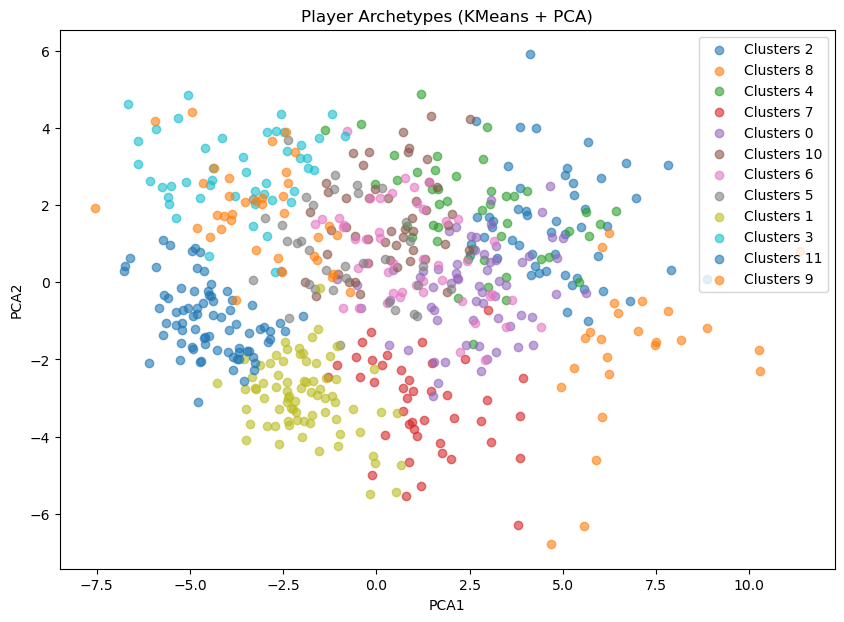

In [210]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D
pca = PCA(n_components=2)
reduced = pca.fit_transform(finalNHL_df)

nhl_df["PCA1"] = reduced[:,0]
nhl_df["PCA2"] = reduced[:,1]

# Plot
plt.figure(figsize=(10,7))
for cluster_id in nhl_df["Clusters"].unique():
    cluster_data = nhl_df[nhl_df["Clusters"] == cluster_id]
    plt.scatter(cluster_data["PCA1"], cluster_data["PCA2"], label=f"Clusters {cluster_id}", alpha=0.6)

plt.legend()
plt.title("Player Archetypes (KMeans + PCA)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

(595, 18)

PC1: Top 3 features: [('PTS/60', 0.260256701828097), ('A/60', 0.23037058873999802), ('G/60', 0.228901549726806)]

PC2: Top 3 features: [('FO%', 0.30083245280510423), ('Thru%', 0.2743706307239559), ('SPCT', 0.25686377399765303)]

PC3: Top 3 features: [('oiSH%', 0.42413595620027644), ('PDO', 0.41719211140960843), ('FA/60', 0.3041997033121262)]

PC4: Top 3 features: [('+/-', 0.4377955551564994), ('oiSV%', 0.3515827023065107), ('PDO', 0.34028591129531705)]

PC5: Top 3 features: [('FOW/60', 0.4220499378212319), ('FOL/60', 0.408008285791838), ('SH/GP', 0.2694045458190769)]

PC6: Top 3 features: [('SH/GP', 0.45176781549861245), ('SHG/GP', 0.4086871354966749), ('CF/60', 0.2816701723762687)]

PC7: Top 3 features: [('PIM/60', 0.5710912059013131), ('HIT/60', 0.40852822515012305), ('A/60', 0.3124584293833925)]

PC8: Top 3 features: [('FOW/60', 0.32583850315777024), ('FOL/60', 0.3180139736723179), ('FA/60', 0.30925086300581606)]

PC9: Top 3 features: [('TAKE/60', 0.6743438481650574), ('dZS%', 0.291

SHG/GP     3.369102
GIVE/60    3.192575
SH/GP      3.055776
TAKE/60    3.044118
PIM/60     2.965308
oiSV%      2.844739
GWG/60     2.818100
Thru%      2.696813
BLK/60     2.502315
PPG/GP     2.462898
oZS%       2.456765
dZS%       2.456759
HIT/60     2.401924
TSA/60     2.383747
FF% rel    2.336715
dtype: float64
